$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[1]{\left\langle{#1}\right\rangle}$$

<center><h2> Part II - Practice </h2></center>

<center><h4> Introduction to qiskit </h4></center>

<center><h2> Qubit Initialisation </h2></center>


$$|0\rangle = \left[\begin{array}  01 \\ 0 \end{array}\right]$$

In [67]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, BasicAer,IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_state_qsphere
import math

n_qubits = 1

# Create a quantum circuit with n qubits
circuit = QuantumCircuit(n_qubits)  

# vector |0>
initial_state = [1, 0]   

# Apply initialisation operation to the 0th qubit
circuit.initialize(initial_state, 0) 

# Let's view our circuit
circuit.draw()  

┌─────────────────┐
q_0: ┤ initialize(1,0) ├
     └─────────────────┘

In [56]:
# choose how to simulate the circuit
backend = Aer.get_backend('statevector_simulator') 

# Create a quantum circuit with n qubits
circuit = QuantumCircuit(n_qubits)  

# vector |0>
initial_state = [1,0]   

# Apply initialisation operation to the 0th qubit
circuit.initialize(initial_state, 0) 

# Do the simulation, returning the result
result = execute(circuit, backend).result().get_statevector()

print(result)

[1.+0.j 0.+0.j]


In [57]:
# backend = BasicAer.get_backend('qasm_simulator')

# run quantum circuit
# result = execute(circuit, backend, shots=8192).result()

# Measurement operation for all qubits
# circuit.measure_all()
# circuit.draw()

Another quantum state:

<center>
$|q\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle$
</center>

In [58]:
# Custom Initialisation
initial_state = [1/math.sqrt(2), 1j/math.sqrt(2)]  # Define state |q>

qc = QuantumCircuit(1) # quantum circuit
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`

state = execute(qc, backend).result().get_statevector() # Execute the circuit
print(state) # Print the result

[0.70710678+0.j         0.        +0.70710678j]


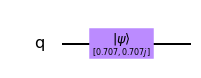

In [59]:
#qc.measure_all()
qc.draw('mpl')

In [60]:
# run quantum circuit
# results = execute(qc, backend).result().get_counts()

# print(results)

# plot_histogram(results)

In [61]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

state = execute(qc, backend).result().get_statevector() # Execute the circuit
print(state) # Print the result

[0.+0.j 1.+0.j]


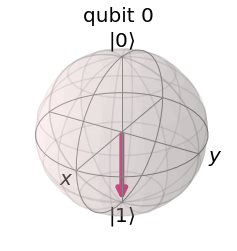

In [62]:
backend = Aer.get_backend('statevector_simulator')

out = execute(qc,backend).result().get_statevector()

plot_bloch_multivector(out)

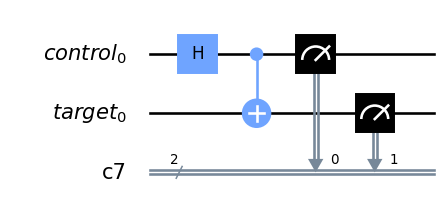

In [63]:
## Bell state

# initialisation
control = QuantumRegister(1, name='control')
target = QuantumRegister(1, name='target')
bits = ClassicalRegister(2)

qc = QuantumCircuit(control, target, bits)

# Apply H-gate to the first qubit:
qc.h(control)

# Apply a CNOT:
qc.cx(control_qubit=control, target_qubit =target)

final_state = execute(qc, backend).result().get_statevector()

qc.measure(qubit=control, cbit=bits[0])
qc.measure(qubit=target, cbit=bits[1])

qc.draw('mpl', scale=1.3)# , filename='bell_circuit.png')

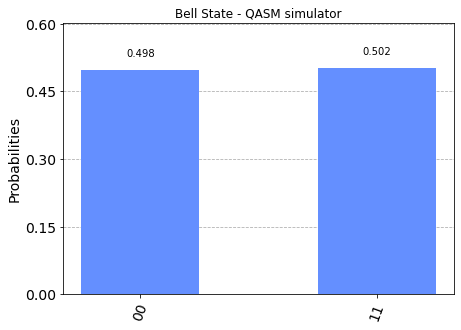

In [64]:
# QASM 
backend = BasicAer.get_backend('qasm_simulator')

shots = 8192

result_qasm = execute(qc, backend, shots=shots).result().get_counts()
plot_histogram(result_qasm, title="Bell State - QASM simulator") #.savefig('QASM_bell.png')

In [68]:
# Execution on real device
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
device = provider.get_backend('ibmq_santiago')

C:\Users\anton\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [28]:
result = execute(qc, device, shots=shots).result().get_counts()

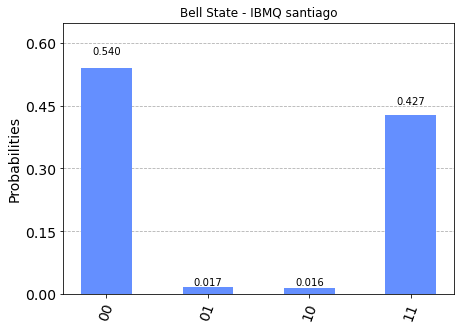

In [29]:
plot_histogram(result, title="Bell State - IBMQ santiago")